In [1]:
from data import *
from Unet import UNET
import torch.nn.functional as F
import torch
import torch.nn as nn 
import torchvision.transforms as T
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from model import PTModel
import cv2
# import torchvision.t

In [2]:
path = 'Unet_depth20.pth'
# model = UNET(in_channels=3,out_channels=1)
model = PTModel()
model.load_state_dict(torch.load(path))
print('Model successfully loaded.')

Model successfully loaded.


In [24]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

44322689

In [3]:
transformed_testing = depthDataset(transform=getNoTransform(), is_test=True)

In [14]:
x = transformed_testing[0]['image']
y = model(x.unsqueeze(0))
y.shape

torch.Size([1, 1, 150, 150])

In [13]:
x = transformed_testing[0]['image']*255
x = x.permute(1,2,0).numpy()
x = x.astype(np.uint8)
# print(x.shape)
# print(x)
# type(x)
# x = np.array(x)
# image = x.astype(np.uint8)
x= x[:, :, ::-1]
cv2.imwrite( 'preds/i0.jpg' , x)
# x*255


True

In [20]:
x = transformed_testing[0]['depth'].permute(1,2,0).numpy()*255/10000
# print(x.shape)
cv2.imwrite( 'preds/gt0.jpg' , x)

True

In [15]:
depth_image = (5000./y[0][0].detach().cpu().numpy())*(255/10000)
# depth_image

In [16]:
import cv2
depth_image = depth_image.astype(np.uint8)
cv2.imwrite( 'preds/test0.png' , depth_image)

True

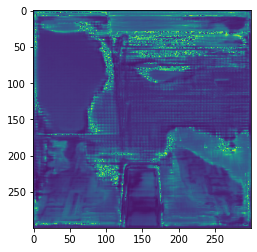

In [27]:
path = 'test1.png'
img = cv2.imread(path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

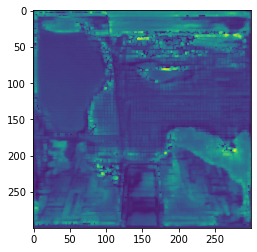

In [28]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
closing = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN,kernel)
plt.imshow(closing)

True

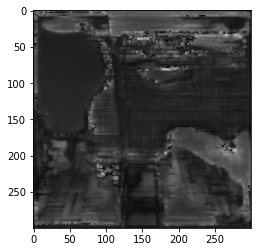

In [29]:
backtorgb = cv2.cvtColor(closing,cv2.COLOR_GRAY2RGB)
plt.imshow(backtorgb)
cv2.imwrite( 'preds/testm.png' , backtorgb)